In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import math

In [3]:
df = pd.read_csv("Data.csv")

In [4]:
df

,area,price
0,2600,55000
1,3000,60000
2,3200,67000
3,3400,72000
4,3600,76000
5,4200,81000


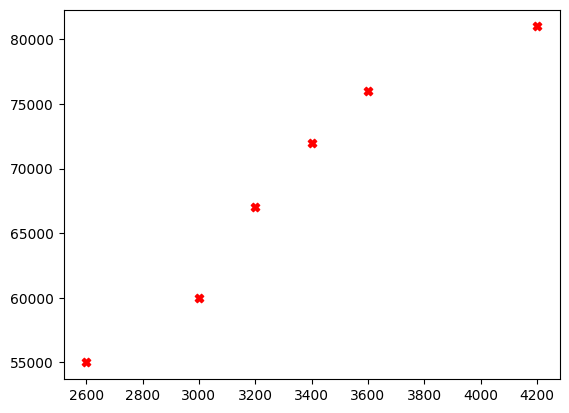

In [5]:
%matplotlib inline
plt.scatter(df.area,df.price,color='red',marker='X')

In [14]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

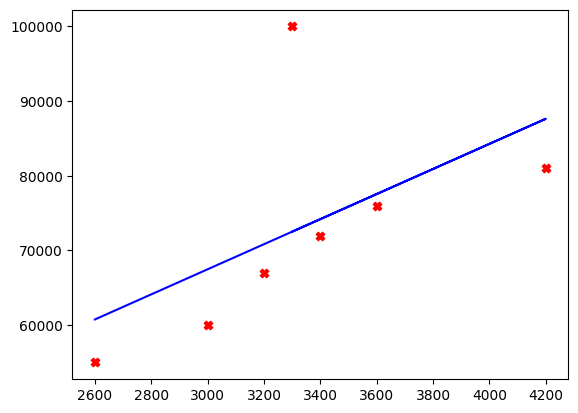

In [15]:
plt.plot(df.area,reg.predict(df[['area']]),color='blue')
plt.scatter(df.area,df.price,color='red',marker='X')

In [32]:
df2 = pd.read_csv('Housing.csv')
df2 = df2.head(20)
df2

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [33]:
df2 = df2.drop(columns='furnishingstatus')

In [34]:
df2 = df2.replace({'yes': 1, 'no': 0})
df2

C:\Users\Spidey\AppData\Local\Temp\ipykernel_71956\3049386632.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2 = df2.replace({'yes': 1, 'no': 0})


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1
6,10150000,8580,4,3,4,1,0,0,0,1,2,1
7,10150000,16200,5,3,2,1,0,0,0,0,0,0
8,9870000,8100,4,1,2,1,1,1,0,1,2,1
9,9800000,5750,3,2,4,1,1,0,0,1,1,1


In [35]:
reg = linear_model.LinearRegression()
reg.fit(df2.drop(columns='price'),df2.price)

LinearRegression()

In [36]:
ans = reg.predict(df2.drop(columns='price'))

In [37]:
df2['expected'] = ans
df2['expected'] = np.floor(df2['expected'])

In [38]:
df2

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,expected
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,11233315.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,12116645.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,11629068.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,12188463.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,9519559.0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,10458783.0
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,11479571.0
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,10163773.0
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,11011920.0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,9256566.0
